<a href="https://colab.research.google.com/github/DoreenDoreen/Prime-Video-View-Time-Prediction/blob/main/VideoViewTimePredictionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Video View Time Prediction Project

* [Part 0: Load Packages and Load Data](#Part-0:-Load-Packages-and-Load-Data)
* [Part 1: Data Exploration](#Part-1:-Data-Exploration)
* [Part 2: Feature Engineering](#Part-2:-Feature-Engineering)
* [Part 3: Model Training](#Part-3:-Model-Training)
* [Part 4: Model Results Evaluation](#Part-3:-Model-Results-Evaluation)

# Part 0: Load Packages and Load Data

In [65]:
#import neccessary libraries
import numpy as np
import pandas as pd
import sklearn as sl
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.3f' % x)   # .float_format  means the precision of displaying numbers, that is 3 dicimal places 
pd.set_option('display.max_columns',None)  # display.max_columns  means maximum displayed columns ， None means display all columns 
pd.set_option('display.max_rows',None) 

In [66]:
# import local file to Google colab
from google.colab import files

uploaded = files.upload()

Saving TVdata.txt to TVdata (1).txt


In [67]:
TV = pd.read_table('TVdata.txt', header=0, sep=',', lineterminator='\n') # header=0 means identifying the first row is the column title 
                                                                          # sep=',' means columns were seperated by ',' 
                                                                          # lineterminator='\n' means the line terminator, identifying '\n' as the character that breaks the file into lines.
TV.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,import_id,release_year,genres,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,awards,mpaa,star_category
0,385504,307127.606,1,3,lionsgate,2013,"Action,Thriller,Drama",69614,15000000,42930462,6.500,112.301,51,other award,PG-13,1.710
1,300175,270338.426,1,3,lionsgate,2013,"Comedy,Crime,Thriller",46705,15000000,3301046,6.500,94.983,41,no award,R,3.250
2,361899,256165.867,1,3,other,2012,"Crime,Drama",197596,26000000,37397291,7.300,115.764,58,other award,R,2.647
3,308314,196622.721,3,4,lionsgate,2008,"Thriller,Drama,War,Documentary,Mystery,Action",356339,15000000,15700000,7.600,130.704,94,Oscar,R,1.667
4,307201,159841.652,1,3,lionsgate,2013,"Crime,Thriller,Mystery,Documentary",46720,27220000,8551228,6.400,105.546,37,other award,R,3.067


# Part 1: Data Exploration

## 1.1 Preview Feature Information

In [68]:
TV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   video_id                       4226 non-null   int64  
 1   cvt_per_day                    4226 non-null   float64
 2   weighted_categorical_position  4226 non-null   int64  
 3   weighted_horizontal_poition    4226 non-null   int64  
 4   import_id                      4226 non-null   object 
 5   release_year                   4226 non-null   int64  
 6   genres                         4226 non-null   object 
 7   imdb_votes                     4226 non-null   int64  
 8   budget                         4226 non-null   int64  
 9   boxoffice                      4226 non-null   int64  
 10  imdb_rating                    4226 non-null   float64
 11  duration_in_mins               4226 non-null   float64
 12  metacritic_score               4226 non-null   i

In [69]:
# check duplicated records
if TV['video_id'].duplicated().sum() == 0:
  print('no duplicated index')

no duplicated index


In [70]:
# delete irrelevant feature 'video_id' 
TVDF = TV.drop(['video_id'], axis=1) 
TVDF.head()

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,import_id,release_year,genres,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,awards,mpaa,star_category
0,307127.606,1,3,lionsgate,2013,"Action,Thriller,Drama",69614,15000000,42930462,6.500,112.301,51,other award,PG-13,1.710
1,270338.426,1,3,lionsgate,2013,"Comedy,Crime,Thriller",46705,15000000,3301046,6.500,94.983,41,no award,R,3.250
2,256165.867,1,3,other,2012,"Crime,Drama",197596,26000000,37397291,7.300,115.764,58,other award,R,2.647
3,196622.721,3,4,lionsgate,2008,"Thriller,Drama,War,Documentary,Mystery,Action",356339,15000000,15700000,7.600,130.704,94,Oscar,R,1.667
4,159841.652,1,3,lionsgate,2013,"Crime,Thriller,Mystery,Documentary",46720,27220000,8551228,6.400,105.546,37,other award,R,3.067


## 1.2 Understand Numerical Features

### 1.2.1 Checking missing data and duplicates

In [71]:
# Check missing data again
TVDF.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.95])  
# below table shows budget and boxoffice may have missing data because min value for both features is 0, which is not possible in reality.

# More details cacluation see the following formula  

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
count,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000
mean,4218.630,7.783,28.104,2001.057,6462.924,2150743.439,2536338.472,5.257,89.556,15.974,0.955
std,13036.080,6.134,11.864,17.497,31596.007,7176604.483,8243516.266,2.123,21.086,26.205,0.955
min,2.188,1.000,1.000,1916.000,0.000,0.000,0.000,0.000,4.037,0.000,0.000
10%,141.985,3.000,13.000,1974.000,8.000,0.000,0.000,2.300,62.391,0.000,0.000
25%,351.169,4.000,20.000,1998.000,81.000,0.000,0.000,4.300,82.602,0.000,0.000
50%,1193.500,6.000,28.000,2008.000,535.000,0.000,0.000,5.800,90.730,0.000,1.000
75%,3356.789,9.000,36.000,2012.000,3053.000,1500000.000,0.000,6.800,99.500,41.000,1.667
95%,14692.834,22.000,48.000,2015.000,26199.500,12000000.000,8551228.000,7.800,119.131,65.000,2.597
max,307127.606,41.000,70.000,2017.000,948630.000,107000000.000,184208848.000,10.000,246.017,100.000,4.000


In [72]:
# Calculate probability of missing records for each feature
# Numerator means the total number of missing records/rows 
# Denominator means the total number of records/rows/entries  

(TVDF == 0).sum(axis=0) / TVDF.shape[0]    # .shape will return a tuple representing the dimensionality of the DataFrame;   
                                           # df.shape[0] return total row,  df.shape[1] return total column

cvt_per_day                     0.000
weighted_categorical_position   0.000
weighted_horizontal_poition     0.000
import_id                       0.000
release_year                    0.000
genres                          0.000
imdb_votes                      0.081
budget                          0.581
boxoffice                       0.756
imdb_rating                     0.081
duration_in_mins                0.000
metacritic_score                0.713
awards                          0.000
mpaa                            0.000
star_category                   0.437
dtype: float64

### 1.2.2 Understanding label feature

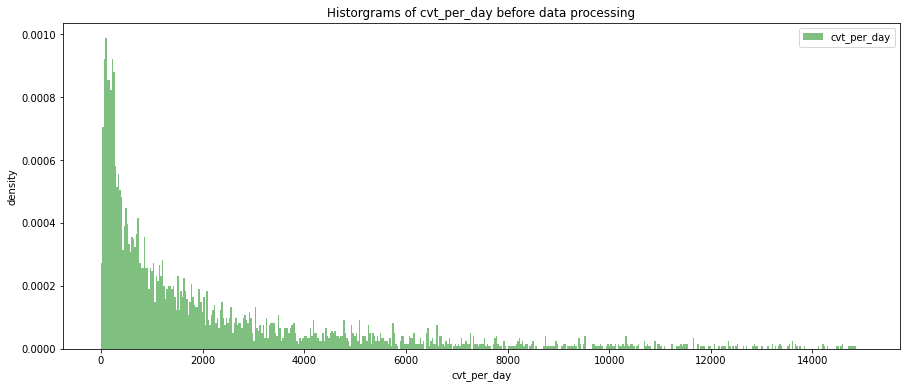

In [73]:
# Visualize the distribution of the label feature: cvt_per_day
plt.figure(figsize=(15, 6))
plt.hist(TVDF['cvt_per_day'], bins=range(0, 15000, 30), color='g', label='cvt_per_day', density=True, alpha=0.5)  
# bins=range(0, 15000, 30) defines the size/step of equal-width bins in the range 0 - 15000 is 30，so the total number of bins will be 15000/30=500  
# max range set up to 15000 is based on the value of the prvious 95% percentile, which is 14692.834  

# density=True, means the first element of the return tuple will be the counts normalized to form a probability density, 
# i.e., the area (or integral) under the histogram will sum to 1.


plt.title('Historgrams of cvt_per_day before data processing')
plt.legend(loc='upper right')
plt.xlabel('cvt_per_day')
plt.ylabel('density')
plt.show()

### 1.2.3 Relationship between numerical features 

In [74]:
cor_matrix = TVDF[['cvt_per_day','weighted_categorical_position','weighted_horizontal_poition'
               ,'release_year', 'imdb_votes', 'budget', 'boxoffice' ,'imdb_rating', 
               'duration_in_mins', 'metacritic_score', 'star_category']].corr()
cor_matrix 

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
cvt_per_day,1.000,-0.148,-0.302,0.046,0.298,0.316,0.312,0.059,0.152,0.249,0.247
weighted_categorical_position,-0.148,1.000,-0.084,-0.069,-0.064,-0.090,-0.074,-0.116,-0.174,-0.044,-0.123
weighted_horizontal_poition,-0.302,-0.084,1.000,0.027,-0.221,-0.211,-0.245,-0.162,-0.102,-0.255,-0.168
release_year,0.046,-0.069,0.027,1.000,-0.083,-0.040,-0.128,-0.199,-0.097,-0.167,-0.198
imdb_votes,0.298,-0.064,-0.221,-0.083,1.000,0.273,0.531,0.163,0.156,0.322,0.225
budget,0.316,-0.090,-0.211,-0.040,0.273,1.000,0.505,0.106,0.251,0.315,0.322
boxoffice,0.312,-0.074,-0.245,-0.128,0.531,0.505,1.000,0.164,0.226,0.465,0.322
imdb_rating,0.059,-0.116,-0.162,-0.199,0.163,0.106,0.164,1.000,0.344,0.347,0.192
duration_in_mins,0.152,-0.174,-0.102,-0.097,0.156,0.251,0.226,0.344,1.000,0.327,0.309
metacritic_score,0.249,-0.044,-0.255,-0.167,0.322,0.315,0.465,0.347,0.327,1.000,0.452


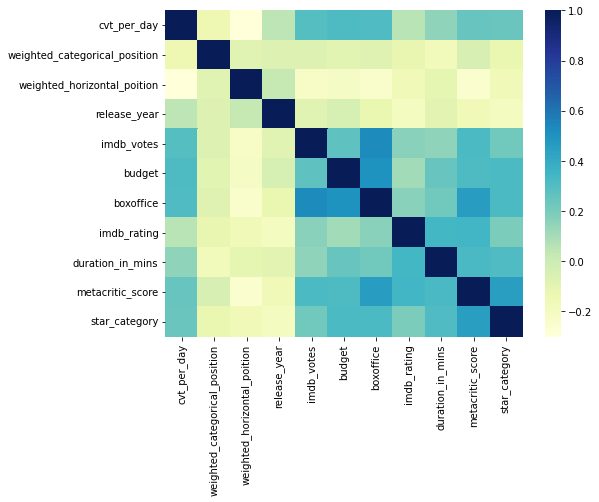

In [75]:
plt.figure(figsize=(8, 6))
sns.heatmap(cor_matrix, cmap='YlGnBu')

## 1.3 Understand Categorical Features

### 1.3.1 Distribution of standard categorical features

In [76]:
# TVDF.info()

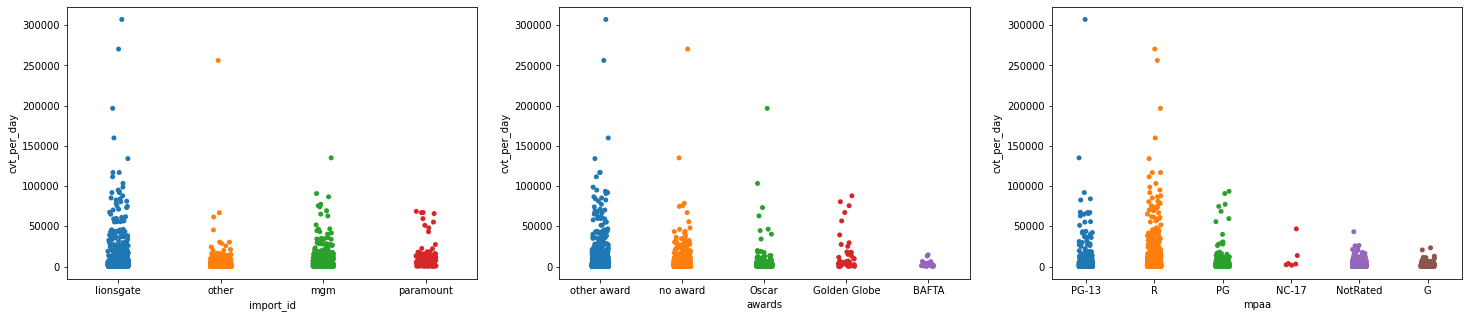

In [77]:
fig, axss = plt.subplots(1,3, figsize=[25,5])

sns.stripplot(x='import_id', y='cvt_per_day', data=TVDF, ax=axss[0])
sns.stripplot(x='awards', y='cvt_per_day', data=TVDF, ax=axss[1])
sns.stripplot(x='mpaa', y='cvt_per_day', data=TVDF, ax=axss[2])

plt.show()

### 1.3.2 Distribution of splited genres

Some videos belongs to more than 1 genre, the genre of each video is splited, this would help emphasize the effect of each individual genre.

In [78]:
# Explore the generes feature - split the genre of each video

gen_split = TVDF['genres'].str.get_dummies(sep=',').sum()  # .str will make sure the type of genres is string；
                                                           #  .get_dummies(sep=',') means the string content was seperated by ',' and will use one hot encode to record； 
                                                           #  .sum() means sum up the occurrence of each genres categories 

print(gen_split)

Action                    739
Adult                       3
Adventure                 363
Animation                 129
Anime                      11
Comedy                   1184
Crime                     437
Documentary               671
Drama                    1677
Fantasy                   243
Foreign/International      64
Holiday                     1
Horror                    762
Independent               393
Kids & Family             280
LGBT                        2
Lifestyle                   7
Music                     171
Musicals                   68
Mystery                   375
Reality                     9
Romance                   591
Sci-Fi                    363
Sport                      77
Thriller                  879
War                       102
Western                   102
dtype: int64


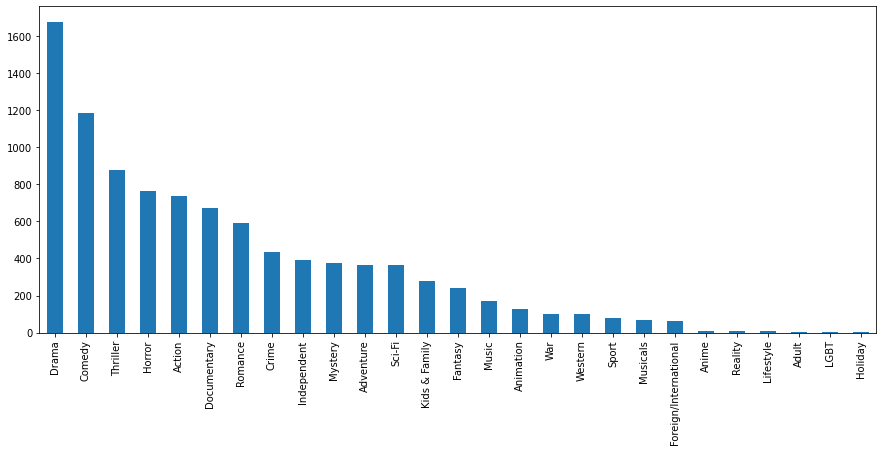

In [79]:
# Draw bar chart to observe the distribution of occurrence for each genra category 
plt.figure(figsize=(15, 6))
gen_split.sort_values(ascending=False).plot.bar() 

### 1.3.3 Distribution of release_year

The release year of video varies through a wide range. Considering the popularity of a video usually decays over time, the release_year should be bucketed based on the release_year range. 

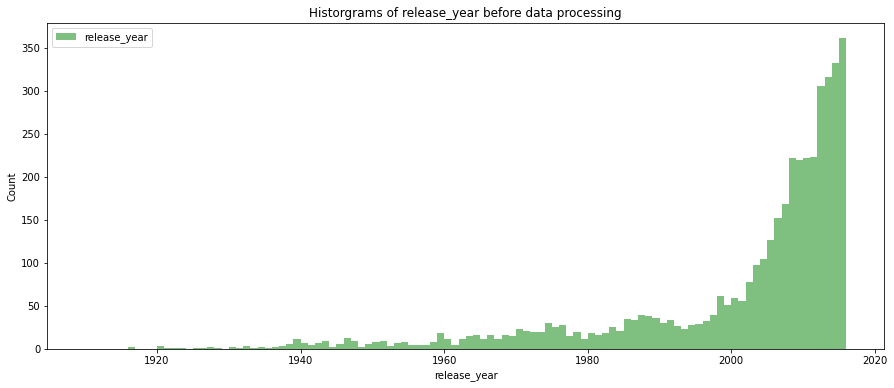

In [80]:
plt.figure(figsize=(15, 6))
plt.hist(TVDF['release_year'], bins=range(1910, 2017, 1), alpha = 0.5, color='g', label = 'release_year')
plt.legend(loc ='upper left')
plt.title('Historgrams of release_year before data processing')
plt.xlabel('release_year')
plt.ylabel('Count')
plt.show()

Findings: 
1. From the picture above, the earlier the year, the fewer movies, and the later the year, the more movies
2. I would like to use “release_year” as a categorical variable instead of a continuous variable because there are too many years and they do not change consistantly and evenly. If I use it as a continuous variable, it is unlikely to represent the meaning of the feature itself.
3. Therefore, it is not possible to divide the "“release_year”" feature every 10 years, because not every 10 years has the same amount of data points. It should be divided according to percentiles, such as 10, 20, ... 90 perentile, so that it will be divided into 10 percentiles.  
4. Strictly speaking, each year is a different category. However, there are too many such cases, so I have made a compromise here, which is using one hot encoding approach based on percentiles.   

# Part 2: Feature Engineering 

## 2.1 Categorical Features

In [81]:
# TVDF.info()

In [82]:
# (TVDF == 0).sum(axis=0) / TVDF.shape[0] 

There are 5 categorical features: import_id, mpaa, awards, genres, and release_year. All of them have no missing data. They can be converted into dummy/indicators. 


1. The first 3 (import_id, mpaa, awards) have relatively small sub-types, they can be easily converted to dummies.

2. The 'genres' feature have 27 different sub-types, 6 of them are rarely observed (refer to previous section). It's reasonable to group these 6 into 1 category 

3. Note: a video may have more than one genre, in the feature preprocessing, all genres are handled individually.  

4. The release_year is binned into 10 buckets based on percentiles of year range between 1916 and 2017.  

### 2.1.1 Convert import_id, mpaa, awards

In [83]:
d_import_id = pd.get_dummies(TVDF['import_id']).astype(np.int64)   # .astype(np.int64) is optional, here I want to make sure the dtype is integer
d_mpaa = pd.get_dummies(TVDF['mpaa']).astype(np.int64)
d_awards = pd.get_dummies(TVDF['awards']).astype(np.int64)

### 2.1.2 Convert genres

In [84]:
d_genres = TVDF['genres'].str.get_dummies(sep=',').astype(np.int64)  # d_genres=TV['genres'].get_dummies(sep=',')  also works； .str and .astype() is optional

d_genres['Misc_genres'] = d_genres['Anime'] | d_genres['Reality'] | d_genres['Lifestyle'] | d_genres['Adult'] | d_genres['LGBT'] | d_genres['Holiday']
# If Anime or Reality or Lifestyle or ... existied,  store as Misc_genres feature; Misc represents miscellaneous

d_genres.drop(['Anime', 'Reality','Lifestyle', 'Adult','LGBT','Holiday'], inplace=True, axis=1) 


### 2.1.3 Convert release_year

In [85]:
# preview percentile of release_year

TVDF['release_year'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
# .quantile() result could see different percentile have unequal year records of release_year  

0.100   1974.000
0.200   1991.000
0.300   2001.000
0.400   2006.000
0.500   2008.000
0.600   2010.000
0.700   2012.000
0.800   2013.000
0.900   2014.000
Name: release_year, dtype: float64

In [86]:
# bin release_year and convert into 10 bins 

bin_year = [1916, 1974, 1991, 2001, 2006, 2008, 2010, 2012, 2013, 2014, 2017]  #  Defines the bin edges allowing for non-uniform width for later use
year_range = ['1916-1974', '1974-1991', '1991-2001', '2001-2006','2006-2008','2008-2010','2010-2012','2012-2013',
              '2013-2014','2014-2017']

In [87]:

year_bin = pd.cut(TVDF['release_year'], bins=bin_year, labels=year_range)  # .cut() will return whatever type defined by labels parameter.  

year_bin.head()

0    2012-2013
1    2012-2013
2    2010-2012
3    2006-2008
4    2012-2013
Name: release_year, dtype: category
Categories (10, object): ['1916-1974' < '1974-1991' < '1991-2001' < '2001-2006' ... '2010-2012' <
                          '2012-2013' < '2013-2014' < '2014-2017']

In [88]:
type(year_bin)

pandas.core.series.Series

In [89]:
d_year = pd.get_dummies(year_bin).astype(np.int64)  # Dummy coded each row records into these 10 bins of year range   
d_year.head()

,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0


### 2.1.4 Create new dataframe

In [90]:
# Drop previous categorical features, add new dummy variables

temp_tv=TVDF.drop(['import_id', 'mpaa','awards','genres', 'release_year'], axis=1)   

newTV = pd.concat([temp_tv, d_import_id, d_mpaa, d_awards, d_genres, d_year], axis=1) 

newTV.head()

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category,lionsgate,mgm,other,paramount,G,NC-17,NotRated,PG,PG-13,R,BAFTA,Golden Globe,Oscar,no award,other award,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Fantasy,Foreign/International,Horror,Independent,Kids & Family,Music,Musicals,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Misc_genres,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
0,307127.606,1,3,69614,15000000,42930462,6.500,112.301,51,1.710,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,270338.426,1,3,46705,15000000,3301046,6.500,94.983,41,3.250,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,256165.867,1,3,197596,26000000,37397291,7.300,115.764,58,2.647,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,196622.721,3,4,356339,15000000,15700000,7.600,130.704,94,1.667,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
4,159841.652,1,3,46720,27220000,8551228,6.400,105.546,37,3.067,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


## 2.2 Numerical Features

In [91]:
TVDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cvt_per_day                    4226 non-null   float64
 1   weighted_categorical_position  4226 non-null   int64  
 2   weighted_horizontal_poition    4226 non-null   int64  
 3   import_id                      4226 non-null   object 
 4   release_year                   4226 non-null   int64  
 5   genres                         4226 non-null   object 
 6   imdb_votes                     4226 non-null   int64  
 7   budget                         4226 non-null   int64  
 8   boxoffice                      4226 non-null   int64  
 9   imdb_rating                    4226 non-null   float64
 10  duration_in_mins               4226 non-null   float64
 11  metacritic_score               4226 non-null   int64  
 12  awards                         4226 non-null   o

In [92]:
(TVDF == 0).sum(axis=0) / TVDF.shape[0]

cvt_per_day                     0.000
weighted_categorical_position   0.000
weighted_horizontal_poition     0.000
import_id                       0.000
release_year                    0.000
genres                          0.000
imdb_votes                      0.081
budget                          0.581
boxoffice                       0.756
imdb_rating                     0.081
duration_in_mins                0.000
metacritic_score                0.713
awards                          0.000
mpaa                            0.000
star_category                   0.437
dtype: float64

### 2.2.1 Missing data

1. Among the 10 numerical features (not include video_id), 4 features (budget, boxoffice, metacritic_score, star_category) have over 25% of missing values (shown as '0', which is not possible in reality). 
2. There are 2 features have less than 10% of missing data: imdb_votes, imdb_rating.
3. There are 3242 samples have at least one missing data.

In [93]:
# step 1: replace those missing data to nan 
newTV[['budget','boxoffice','metacritic_score', 'star_category','imdb_votes', 'imdb_rating']] = newTV[['budget','boxoffice','metacritic_score', 'star_category','imdb_votes', 'imdb_rating']].replace(0, np.nan)
print(newTV.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cvt_per_day                    4226 non-null   float64
 1   weighted_categorical_position  4226 non-null   int64  
 2   weighted_horizontal_poition    4226 non-null   int64  
 3   imdb_votes                     3882 non-null   float64
 4   budget                         1772 non-null   float64
 5   boxoffice                      1032 non-null   float64
 6   imdb_rating                    3882 non-null   float64
 7   duration_in_mins               4226 non-null   float64
 8   metacritic_score               1214 non-null   float64
 9   star_category                  2380 non-null   float64
 10  lionsgate                      4226 non-null   int64  
 11  mgm                            4226 non-null   int64  
 12  other                          4226 non-null   i

In [94]:
newTV.head()

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category,lionsgate,mgm,other,paramount,G,NC-17,NotRated,PG,PG-13,R,BAFTA,Golden Globe,Oscar,no award,other award,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Fantasy,Foreign/International,Horror,Independent,Kids & Family,Music,Musicals,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Misc_genres,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
0,307127.606,1,3,69614.000,15000000.000,42930462.000,6.500,112.301,51.000,1.710,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,270338.426,1,3,46705.000,15000000.000,3301046.000,6.500,94.983,41.000,3.250,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,256165.867,1,3,197596.000,26000000.000,37397291.000,7.300,115.764,58.000,2.647,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,196622.721,3,4,356339.000,15000000.000,15700000.000,7.600,130.704,94.000,1.667,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
4,159841.652,1,3,46720.000,27220000.000,8551228.000,6.400,105.546,37.000,3.067,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [95]:
# (newTV == 0).sum(axis=0) / newTV.shape[0]

In [96]:
# Step 2: filing nan by mean value 
newTV1=newTV.copy()
newTV1['boxoffice']=newTV1['boxoffice'].fillna(newTV1['boxoffice'].mean())
newTV1['metacritic_score']=newTV1['metacritic_score'].fillna(newTV1['metacritic_score'].mean())
newTV1['star_category']=newTV1['star_category'].fillna(newTV1['star_category'].mean())
newTV1['imdb_votes']=newTV1['imdb_votes'].fillna(newTV1['imdb_votes'].mean())
newTV1['imdb_rating']=newTV1['imdb_rating'].fillna(newTV1['imdb_rating'].mean())
newTV1['budget']=newTV1['budget'].fillna(newTV1['budget'].mean())
print(newTV1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cvt_per_day                    4226 non-null   float64
 1   weighted_categorical_position  4226 non-null   int64  
 2   weighted_horizontal_poition    4226 non-null   int64  
 3   imdb_votes                     4226 non-null   float64
 4   budget                         4226 non-null   float64
 5   boxoffice                      4226 non-null   float64
 6   imdb_rating                    4226 non-null   float64
 7   duration_in_mins               4226 non-null   float64
 8   metacritic_score               4226 non-null   float64
 9   star_category                  4226 non-null   float64
 10  lionsgate                      4226 non-null   int64  
 11  mgm                            4226 non-null   int64  
 12  other                          4226 non-null   i

In [97]:
# (newTV1 == 0).sum(axis=0) / newTV1.shape[0]

### Part 2.2.2 Feature scaling 

The impact of different scaling methods on the model performance is small. This project used the standard scaling (sc) data .

2 types of scaling feature approaches：

*   Type 1: Standardization: calculating mean and sdandard deviation，then normalize or standardize numerical feature 
*   Type 2: min-max: Forcibly pull the variable between 0 and 1 or -1 and 1 through the maximum value and the minimum value


In [98]:
# First way of scaling, Standard scaling or standardization 
 
scale_lst = ['weighted_categorical_position', 'weighted_horizontal_poition', 'budget','boxoffice', 
             'imdb_votes','imdb_rating','duration_in_mins', 'metacritic_score','star_category']
newTV_sc = newTV1.copy() # optional code

In [99]:
init_scale = preprocessing.StandardScaler()
sc_scale = init_scale.fit(newTV_sc[scale_lst])

newTV_sc[scale_lst] = sc_scale.transform(newTV_sc[scale_lst])
newTV_sc.head()

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category,lionsgate,mgm,other,paramount,G,NC-17,NotRated,PG,PG-13,R,BAFTA,Golden Globe,Oscar,no award,other award,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Fantasy,Foreign/International,Horror,Independent,Kids & Family,Music,Musicals,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Misc_genres,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
0,307127.606,-1.106,-2.116,1.984,1.470,4.696,0.542,1.079,-0.630,0.033,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,270338.426,-1.106,-2.116,1.258,1.470,-1.022,0.542,0.257,-1.997,3.434,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,256165.867,-1.106,-2.116,6.043,3.108,3.898,1.100,1.243,0.327,2.102,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,196622.721,-0.780,-2.032,11.077,1.470,0.767,1.309,1.952,5.250,-0.063,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
4,159841.652,-1.106,-2.116,1.258,3.290,-0.265,0.472,0.758,-2.544,3.029,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [100]:
## Second way of scaling, MinMax scaling or normalization  
# newTV_mm = newTV.copy()
# mm_scale = preprocessing.MinMaxScaler().fit(newTV_mm[scale_lst])
# newTV_mm[scale_lst] = mm_scale.transform(newTV_mm[scale_lst])
# newTV_mm.head() 

# Part 3: Model Training

## 3.1 Split datasets

In [101]:
newTV_sc.columns

Index(['cvt_per_day', 'weighted_categorical_position',
       'weighted_horizontal_poition', 'imdb_votes', 'budget', 'boxoffice',
       'imdb_rating', 'duration_in_mins', 'metacritic_score', 'star_category',
       'lionsgate', 'mgm', 'other', 'paramount', 'G', 'NC-17', 'NotRated',
       'PG', 'PG-13', 'R', 'BAFTA', 'Golden Globe', 'Oscar', 'no award',
       'other award', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Foreign/International', 'Horror',
       'Independent', 'Kids & Family', 'Music', 'Musicals', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western',
       'Misc_genres', '1916-1974', '1974-1991', '1991-2001', '2001-2006',
       '2006-2008', '2008-2010', '2010-2012', '2012-2013', '2013-2014',
       '2014-2017'],
      dtype='object')

In [102]:
# split into 2 datasets, one for model training (85%), another for model testing(15%)
train, test = train_test_split(newTV_sc, test_size=0.15, random_state = 3)  

In [103]:
# train.info()  # 3592 entries, total 57 columns

In [104]:
# test.info()  # 634 entries, total 57 columns

In [105]:
model_train_x = train.drop(['cvt_per_day'], axis = 1)  # delete the label 'cvt_per_day' in training dataset，all the resting features are those to train the model
model_train_y = train['cvt_per_day'] # select label from the training datase 

model_test_x = test.drop(['cvt_per_day'], axis = 1)   
model_test_y = test['cvt_per_day'] 

## Part 3.2 Lasso linear regression (L1)

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge  
from sklearn.metrics import mean_squared_error, r2_score #not used
from math import sqrt

In [107]:
# split the training dataset into 2 parts, one part (85%) for training model, another part（15%） for validation (hold-out data)

lr_train, lr_validate = train_test_split(train, test_size=0.15, random_state = 0)  

lr_train_x = lr_train.drop(['cvt_per_day'], axis = 1) 
lr_train_y = lr_train['cvt_per_day'] 

lr_validate_x = lr_validate.drop(['cvt_per_day'], axis = 1) 
lr_validate_y = lr_validate['cvt_per_day'] 

In [108]:
alphas = np.linspace(1, 201, num=500)  # Returns num=500 evenly spaced numbers over a specified interval [start=1, stop=201], return ndarray alphas

scores = np.empty_like(alphas)  # .empty_like() will return an empty array with same shape of alphas    

In [109]:
# print(alphas)

In [110]:
opt_a = float('-inf')   # opt_a is to store the alpha level when the best hyper parameter found
max_score = float('-inf')  # max_score is to store hyper-parameter when the best R^2 is found

for i, a in enumerate(alphas):   # enumerate() will return index and corresponding element of alpha value 
    lasso = Lasso()  
    lasso.set_params(alpha = a)  # a is the alpha parameter; iteratively try every single hyper-parameter  
    lasso.fit(lr_train_x, lr_train_y)  #  .fit()  will use training dataset to fit model so that obtain lasso 
    scores[i] = lasso.score(lr_validate_x, lr_validate_y)   # lasso.score() will return R^2 after using the validation set and fitting the model; 
                                                            # Then, store R^2 into scores array at index i  
    if scores[i] > max_score:      # update max_score  
        max_score = scores[i]    
        opt_a = a   # update opt_a as the corresponding alpha level when a better hyper-parameter is found  
        lasso_save = lasso # optional code  => lasso_save is used to store the best lasso hyper-parameter for later use again 

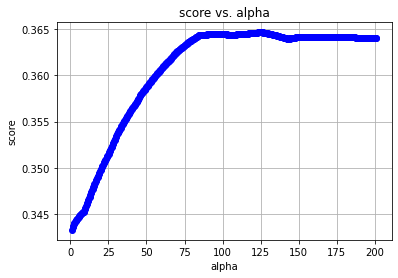

The optimaized alpha： 125.64929859719439  and score of Lasso linear is:  0.3646194368519905


In [111]:
# Draw graph

plt.plot(alphas, scores, color='b', linestyle='dashed', marker='o', markerfacecolor='b', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
model1_para = opt_a
print ('The optimaized alpha：', opt_a, ' and score of Lasso linear is: ', max_score)  


In [112]:
# combine the validate data and training data, use the optimal alpha, re-train the model  

lasso_f = Lasso()
lasso_f.set_params(alpha = opt_a)
lasso_f.fit(model_train_x, model_train_y)  # combine validation set and training set together, which is the original whole training dataset (85%) 

# The above approach is too complicated, we can just use Grid Search 

Lasso(alpha=125.64929859719439)

## Part 3.3 Ridge linear regression (L2) 

In [113]:
# Use the same training data set, same logic as that in Lasso (linear features)  

alphas = np.linspace (1, 201, num=500)
scores = np.empty_like(alphas)

In [114]:
opt_a = float('-inf')
max_score = float('-inf')

for i, a in enumerate(alphas):
    ridge = Ridge()
    ridge.set_params(alpha = a)
    ridge.fit(lr_train_x, lr_train_y)
    scores[i] = ridge.score(lr_validate_x, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        ridge_save = ridge #optional code


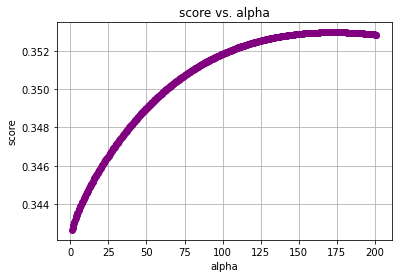

The optimaized alpha and score of Ridge linear is: 


(None, 172.5430861723447, 0.3529726994066543)

In [115]:
plt.plot(alphas, scores, color='purple', linestyle='dashed', marker='o', markerfacecolor='purple', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
model3_para = opt_a
print ('The optimaized alpha and score of Ridge linear is: '), opt_a, max_score

In [116]:
# combine the 15% validate data and 85% training data, use the optimal alpha, re-train the model  

ridge_f = Ridge() 
ridge_f.set_params(alpha = opt_a)

ridge_f.fit(model_train_x, model_train_y) # validation data is part of the 85% training datset，so here should use the whole training dataset to fit ridge regression model  

# ridge_f is the Ridge model (linear feature), to be tested with test data. 

Ridge(alpha=172.5430861723447)

## Part 3.4 Random Forest

In [117]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [118]:
rf = RandomForestRegressor(random_state=2, max_features='sqrt')   # max_features = "sqrt" means the number of features is sqrt(n_features) 
                                                                  # when looking for the best number of features to split  to the next level. 

param_grid = {
        'n_estimators':[55,56,57,58,59,60,61,62,63,64,65],   # how many tree are divided into the next level
        'max_depth':[15,16,17,18,19,20,21]  # tree depth 
    }

clf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5) # Geide Search to find optimized hyper-parameter   
clf.fit(model_train_x, model_train_y) # use the training dataset to fit RF model  

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_features='sqrt',
                                             random_state=2),
             param_grid={'max_depth': [15, 16, 17, 18, 19, 20, 21],
                         'n_estimators': [55, 56, 57, 58, 59, 60, 61, 62, 63,
                                          64, 65]})

In [119]:
max_depth = [15,16,17,18,19,20,21]    # 7 rows or levels   
n_estimators = [55,56,57,58,59,60,61,62,63,64,65]   # 11 cols   

values = clf.cv_results_['mean_test_score']  # clf.cv_results_ will return a dictionary, 'mean_test_score' is one key 

scores = values.reshape(len(max_depth), len(n_estimators))  # for later drawing the graph  

<Figure size 432x288 with 0 Axes>

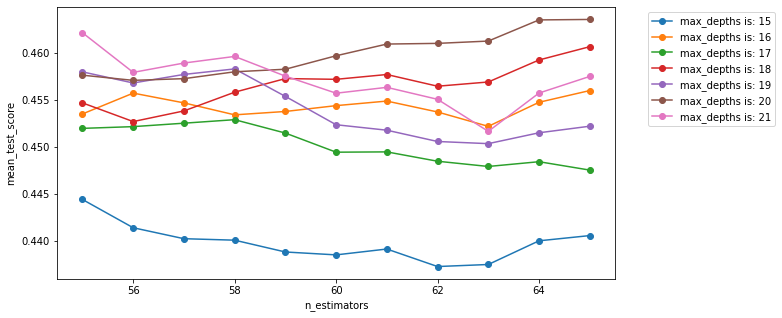

the best parameter for max_depth is: 20
the best parameter for n_estimators is: 65


In [120]:
plt.figure(1) 
plt.figure(figsize=[10, 5])
plt.subplot(1,1,1)  # subplot(nrows, ncols, index, **kwargs)

for i, j in enumerate(max_depth): 
  plt.plot(n_estimators, scores[i], '-o', label='max_depths is: ' + str(j))  
                                  #  '-' => solid line style          
                                  #  'o' => circle marker   

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.5)
plt.xlabel('n_estimators')
plt.ylabel('mean_test_score')
plt.show()

print('the best parameter for max_depth is: ' + str(clf.best_params_['max_depth']))
print('the best parameter for n_estimators is: ' + str(clf.best_params_['n_estimators']))

Findings: As can be seen from the figure above, the best line is the No.20 purple line, which corresponds to the highest y value, that is, R^2, and the corresponding depth is 20, which can hold 65 trees in total.

# Part 4: Model Results Evaluation

## 4.1: Evaluate all models

In [121]:
# create 4 new datasets  

train_x = model_train_x
train_y = model_train_y

test_x = model_test_x
test_y = model_test_y

In [122]:
# For Lasso Regression

from sklearn.linear_model import Lasso
from sklearn.metrics import  mean_squared_error

lasso = Lasso(alpha=model1_para) # model1_para is the optimal hyper parameter that was trained before  
lasso.fit(train_x, train_y) # use features in original training set to predict the label and to fit a Lasso Regression Model  
pred_y = lasso.predict(test_x) # use features in testing dataset to do prediction，store obtained results of label score as pred_y   

lasso_score = lasso.score(test_x, test_y)  # obtain R^2 throug compaing predicted pred_y with the test_y in testing set    
MSE_lasso = mean_squared_error(test_y, pred_y) 
RMSE_lasso = np.sqrt(MSE_lasso) 

print ('lasso R^2 score: ', lasso_score)
print ('Mean square error of lasso: ', MSE_lasso)
print ('Root mean squared error of lasso:', RMSE_lasso)

lasso R^2 score:  0.09898048413763116
Mean square error of lasso:  239104131.54554778
Root mean squared error of lasso: 15462.99232184857


In [123]:
# For Ridge Regression 

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ridge = Ridge(alpha=model3_para)  # model3_para is the optimal hyper parameter that was trained before
ridge.fit(train_x, train_y) 
pred_y = ridge.predict(test_x)

ridge_score = ridge.score(test_x, test_y)  # R^2
MSE_ridge = mean_squared_error(test_y, pred_y)
RMSE_ridge = np.sqrt(MSE_ridge)

print ('ridge R^2 score: ', ridge_score)
print ('Mean square error of ridge: ', MSE_ridge)
print ('Root mean squared error of ridge:', RMSE_ridge)

ridge R^2 score:  0.1138238752321652
Mean square error of ridge:  235165131.2526933
Root mean squared error of ridge: 15335.094758516925


In [124]:
# For randomforest regression

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor(n_estimators=clf.best_params_['n_estimators'], max_depth=clf.best_params_['max_depth'], max_features='sqrt', random_state=2, n_jobs=-1)
                                                        # n_jobs is to identify how many processes or threads need to the use for routines parallelized with joblib
                                                        # If n_jobs=1, which means it don't use joblib parallelism at all, that is useful for debugging.

rf.fit(train_x, train_y)    
pred_y = rf.predict(test_x)   

rf_score = rf.score(test_x, test_y) # return R^2 
MSE_rf = mean_squared_error(test_y, pred_y)
RMSE_rf = np.sqrt(MSE_rf)

print ('rf R^2 score: ', rf_score)
print ('Mean square error of rf: ', MSE_rf)
print ('Root mean squared error of rf:', RMSE_rf)

# R^2 = 0.5 does not indicate the model performance is not good. Because it is real data, for real data, reaching R^2 = 0.5 is pretty good

rf R^2 score:  0.5169719005665712
Mean square error of rf:  128181479.08437566
Root mean squared error of rf: 11321.725976386095


## 4.2: Model Comparison

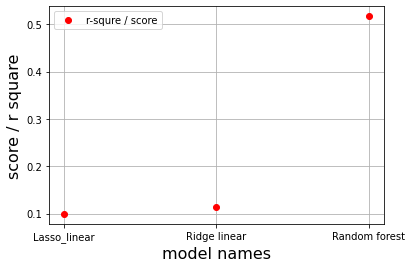

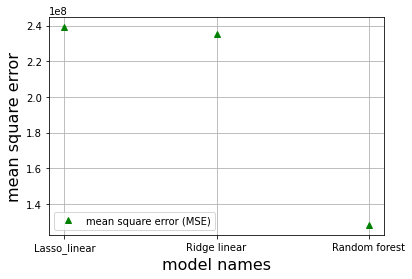

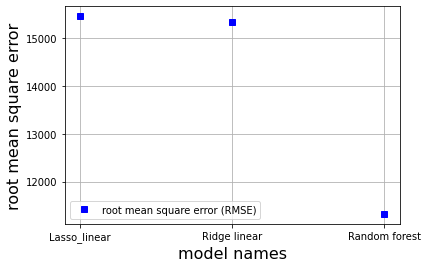

In [125]:
lst_score = [lasso_score, ridge_score, rf_score]  # R^2 for each model 
MSE_lst =  [MSE_lasso, MSE_ridge, MSE_rf]
RMSE_lst =  [RMSE_lasso, RMSE_ridge, RMSE_rf]
model_lst = ['Lasso_linear', 'Ridge linear', 'Random forest']

plt.figure(1)
plt.plot(model_lst, lst_score, 'ro')
plt.legend(['r-squre / score'])
plt.xlabel('model names',fontsize =16)
plt.ylabel('score / r square', fontsize =16)
plt.grid(True)
plt.show()

plt.figure(2)
plt.plot(model_lst, MSE_lst, 'g^')
plt.legend(['mean square error (MSE)'])
plt.xlabel('model names', fontsize =16)
plt.ylabel('mean square error', fontsize =16)
plt.grid(True)
plt.show()

plt.figure(3)
plt.plot(model_lst, RMSE_lst, 'bs')
plt.legend(['root mean square error (RMSE)'])
plt.xlabel('model names', fontsize =16)
plt.ylabel('root mean square error', fontsize =16)
plt.grid(True)
plt.show()

Finding:
1. The 1st table: It can be seen that comparing the three models with the y-axis R^2 as the standard, Lasso is the worst, and RF is the best because the R^2 value is the largest and highest.

2. The 2nd table: It can be seen that, taking MSE as the model measurement standard, Lasso Ridge is very poor because MSE is large, and RF is the best because MSE value is the smallest

3. The 3rd picture: It can be seen that taking RMSE as the model measurement standard, Lasso Ridge is very poor because the RMSE is large, and RF is the best because the RMSE value is the smallest

4. According to MSE, RMSE, and R square, the Random Forest Regression has the best performance

## 4.3 Feature Importance

In [129]:
importances = rf.feature_importances_
feature_name = train_x.columns.values
indices = np.argsort(importances)[::-1] 
# np.argsort(importances) will returns the indices as ndarray type that would sort an array   

<Figure size 432x288 with 0 Axes>

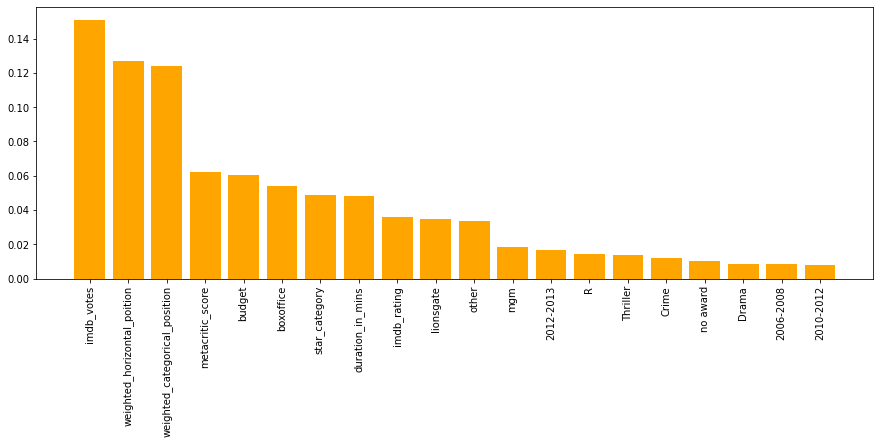

In [128]:
plt.figure(1)
plt.figure(figsize = [15,5])
plt.bar(feature_name[indices[:20]], importances[indices[:20]], color='orange')  
plt.xticks(rotation=90)  # control the rotation direction of label as 90 degree 
plt.show()

Findings:
1. From the figure above, the most important feature is the number of imdb_votes likes, that is, the more people like it, the more popular the movie will be; 

2. The second important feature is category_position and the third important feature is horizontal_position. That is the "Golden Triangle" because if a movie appearing in the upper left corner, then its click-through rate will become higher;

3. At the same time, the least important feature is n_years (the time when the movie appeared), that is, the year the movie came out is not very important. 